In [1]:
import os
import random
import pickle
import numpy as np
import tensorflow as tf

os.environ['TF_DETERMINISTIC_OPS'] = '1'

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

def save_streams(name, data):
    with open(f'{name}.pkl', 'wb') as f:
        pickle.dump(data, f)

def load_streams(name):
    with open(f'{name}.pkl', 'rb') as f:
        loaded_dict = pickle.load(f)
    return loaded_dict

2022-07-16 18:52:51.848313: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-16 18:52:51.848416: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## ML

In [8]:
train_data = load_streams('TRAIN_ML_DATA')
test_data = load_streams('TEST_ML_DATA')

X_train, y_train = np.array(train_data['X']), np.array(train_data['y'])
y_train = np.array([d[0] for d in y_train])

X_test, y_test = np.array(test_data['X']), np.array(test_data['y'])
y_test = np.array([d[0] for d in y_test])

print(len(X_train), len(y_train)) # 150 150
print(X_train.shape, y_train.shape) # (150, 13, 100) (150,)

print(len(X_test), len(y_test)) # 40 40
print(X_test.shape, y_test.shape) # (40, 13, 100) (40,)

n_features = X_train.shape[1]
n_steps = X_train.shape[2]

150 150
(150, 13, 100) (150,)
40 40
(40, 13, 100) (40,)


In [9]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [15]:
# from keras import callbacks
# earlystopping = callbacks.EarlyStopping(
#     monitor ="val_loss",
#     mode ="min", patience = 50,
#     restore_best_weights = True
# )

# # define model
model = Sequential()
model.add(LSTM(100, activation='softmax', input_shape=(n_features, n_steps)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())
# fit model
history = model.fit(X_train, y_train, epochs=2000, batch_size=40, validation_split=0.1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 80,501
Trainable params: 80,501
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/2000
4/4 [==============================] - 1s 92ms/step - loss: 4.2971 - accuracy: 0.2593 - val_loss: 3.1216 - val_accuracy: 0.3333
Epoch 2/2000
4/4 [==============================] - 0s 22ms/step - loss: 3.3567 - accuracy: 0.2593 - val_loss: 2.8518 - val_accuracy: 0.3333
Epoch 3/2000
4/4 [==============================] - 0s 22ms/step - loss: 3.1105 - accuracy: 0.2593 - val_loss: 2.7090 - val_accuracy: 0.3333
Epoch 4/2000
4/4 [

2022-07-16 19:09:57.077063: W tensorflow/core/data/root_dataset.cc:247] Optimization loop failed: CANCELLED: Operation was cancelled


4/4 [==============================] - 0s 19ms/step - loss: 0.5702 - accuracy: 0.7407 - val_loss: 0.6501 - val_accuracy: 0.6667
Epoch 433/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.5702 - accuracy: 0.7407 - val_loss: 0.6502 - val_accuracy: 0.6667
Epoch 434/2000
4/4 [==============================] - 0s 21ms/step - loss: 0.5702 - accuracy: 0.7407 - val_loss: 0.6504 - val_accuracy: 0.6667
Epoch 435/2000
4/4 [==============================] - 0s 21ms/step - loss: 0.5701 - accuracy: 0.7407 - val_loss: 0.6504 - val_accuracy: 0.6667
Epoch 436/2000
4/4 [==============================] - 0s 21ms/step - loss: 0.5701 - accuracy: 0.7407 - val_loss: 0.6505 - val_accuracy: 0.6667
Epoch 437/2000
4/4 [==============================] - 0s 20ms/step - loss: 0.5702 - accuracy: 0.7407 - val_loss: 0.6504 - val_accuracy: 0.6667
Epoch 438/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.5701 - accuracy: 0.7407 - val_loss: 0.6504 - val_accuracy: 0.6667
Epoch 439/2000

2022-07-16 19:12:05.938248: W tensorflow/core/data/root_dataset.cc:247] Optimization loop failed: CANCELLED: Operation was cancelled


4/4 [==============================] - 0s 34ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.3732 - val_accuracy: 0.6000
Epoch 1960/2000
4/4 [==============================] - 0s 33ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.3732 - val_accuracy: 0.6000
Epoch 1961/2000
4/4 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.3732 - val_accuracy: 0.6000
Epoch 1962/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.3732 - val_accuracy: 0.6000
Epoch 1963/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.3732 - val_accuracy: 0.6000
Epoch 1964/2000
4/4 [==============================] - 0s 23ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.3732 - val_accuracy: 0.6000
Epoch 1965/2000
4/4 [==============================] - 0s 20ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.3732 - v

In [16]:
# evaluate training
train_acc = model.evaluate(X_train, y_train, verbose=0)
print("Accuracy: %.2f%%" % (train_acc[1]*100))

Accuracy: 96.00%


In [17]:
# evaluate test
test_acc = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (test_acc[1]*100))

Accuracy: 82.50%


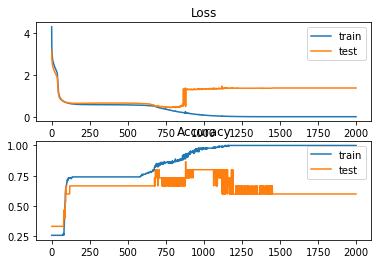

In [18]:
from matplotlib import pyplot

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [14]:
yhat = model.predict(X_test, verbose=0)
print(yhat)
# for y, yh in zip(y_train, yhat):
#     print(f'Predicted: {round(yh[0], 2)} >>>>>>> Actual: {y}')


# x_input = np.array(X_test[r])
# x_input = x_input.reshape((1, n_steps, n_features))
# r = random.randrange(len(X_test))
# print(x_input.shape)
# yhat = model.predict(x_input, verbose=0)
# print(yhat, y_test[r])

[[ 0.2694785 ]
 [ 0.24507597]
 [ 1.2541785 ]
 [ 1.4996903 ]
 [ 1.1592009 ]
 [ 1.1220907 ]
 [ 1.3669722 ]
 [ 0.85263926]
 [ 1.2476969 ]
 [ 1.3452132 ]
 [ 1.144295  ]
 [ 1.1673849 ]
 [ 1.5566599 ]
 [ 1.3575816 ]
 [-0.79719216]
 [ 1.3684433 ]
 [ 0.98648554]
 [ 0.7271923 ]
 [ 0.36845827]
 [ 1.1826375 ]
 [ 0.48062602]
 [-0.46120733]
 [ 1.3200104 ]
 [ 1.1553202 ]
 [ 1.3302052 ]
 [ 1.2992487 ]
 [ 1.5390689 ]
 [ 1.5433483 ]
 [ 0.545421  ]
 [ 1.0602849 ]
 [ 0.8832567 ]
 [ 0.949911  ]
 [ 0.15080039]
 [ 1.2145882 ]
 [ 1.2344522 ]
 [ 1.348618  ]
 [-0.35697663]
 [ 1.5113113 ]
 [ 1.3451903 ]
 [ 1.1930151 ]]
